## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

## Reading files and plotting it

In [3]:
df = pd.read_csv("Bengaluru_House_Data.csv")
dfc = df.copy()
    
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [8]:
#Determining the unique values in area type columns and there counts
df.groupby("area_type")["area_type"].agg("count").sort_values(ascending = False)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [9]:
#Determining the unique values in area type columns and there counts
df["area_type"].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [10]:
# knowing the missing values
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [11]:
df.duplicated().sum()

529

In [12]:
df.drop_duplicates(keep = "last", inplace= True)

In [13]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [14]:
# determining the unique values in size column
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
 df.dropna(inplace = True)

In [16]:
df["bhk"] = df["size"].apply(lambda x: int(x.split(" ")[0]))
df.drop(["size", "society", "availability"], axis = 1, inplace = True)
df.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
5,Super built-up Area,Whitefield,1170,2.0,1.0,38.00,2
11,Plot Area,Whitefield,2785,5.0,3.0,295.00,4


In [17]:
df.bhk.unique()

array([ 2,  4,  3,  1,  5, 11,  9,  6,  7], dtype=int64)

In [18]:
df[df.bhk > 5]

,area_type,location,total_sqft,bath,balcony,price,bhk
459,Super built-up Area,1 Giri Nagar,5000,9.0,3.0,360.0,11
538,Super built-up Area,Mico Layout,5000,9.0,3.0,210.0,9
2252,Super built-up Area,Uttarahalli,3600,6.0,2.0,120.0,6
2620,Super built-up Area,Sathya Sai Layout,11338,9.0,1.0,1000.0,6
2739,Super built-up Area,Giri Nagar,4500,5.0,3.0,250.0,7
4738,Plot Area,Bannerghatta Road,1850,6.0,3.0,150.0,6
6028,Built-up Area,Banashankari,1200,6.0,2.0,180.0,6
10180,Plot Area,KR Puram,1200,6.0,3.0,132.0,6
12750,Plot Area,Whitefield,4000,5.0,1.0,540.0,6


In [19]:
df.total_sqft.value_counts()

total_sqft
1200               168
1100               100
1000                75
1500                72
1300                68
                  ... 
628                  1
547.34 - 827.31      1
2465                 1
4075                 1
4689                 1
Name: count, Length: 1682, dtype: int64

In [20]:
# creating a function to subset ranges values in total square foot column
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
df2 = df[-df["total_sqft"].apply(is_float)]

In [22]:
df2.total_sqft.unique()

array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '1195 - 1440', '1120 - 1145', '3090 - 5002',
       '1160 - 1195', '1115 - 1130', '520 - 645', '1000 - 1285',
       '650 - 665', '633 - 666', '1445 - 1455', '884 - 1116',
       '850 - 1093', '547.34 - 827.31', '580 - 650', '3425 - 3435',
       '1804 - 2273', '3630 - 3800', '4000 - 5249', '1500Sq. Meter',
       '142.61Sq. Meter', '1574Sq. Yards', '1250 - 1305', '670 - 980',
       '1005.03 - 1252.49', '1004 - 1204', '645 - 936', '2710 - 3360',
       '2830 - 2882', '596 - 804', '1255 - 1863', '1300 - 1405',
       '117Sq. Yards', '934 - 1437', '980 - 1030', '2249.81 - 4112.19',
       '1070 - 1315', '500Sq. Yards', '2806 - 3019', '613 - 648',
       '704 - 730', '1210 - 1477', '3369 - 3464', '1125 - 1500',
       '1076 - 1199', '381 - 535', '524 - 894', '540 - 670',
       '2725 - 3250', '888 - 1290', '660 - 700', '385 - 440', '770 - 841',
       '188.89Sq. Yards', '1469 - 1766', '204Sq. Meter',

In [23]:
# function of getting the average of the ranges
def convert_column_to_avg(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try: 
        return float(x)
    except:
        return None


In [24]:
df["total_sqft"] = df["total_sqft"].apply(convert_column_to_avg)

In [25]:
df.dropna(inplace = True)

df.isnull().sum()

area_type     0
location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [26]:
dfc.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [27]:
dfc.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [28]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [29]:
dfc.balcony.value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7129 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   7129 non-null   object 
 1   location    7129 non-null   object 
 2   total_sqft  7129 non-null   float64
 3   bath        7129 non-null   float64
 4   balcony     7129 non-null   float64
 5   price       7129 non-null   float64
 6   bhk         7129 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 445.6+ KB


### Feature Engineering 

In [31]:
df.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Whitefield,1170.0,2.0,1.0,38.00,2
11,Plot Area,Whitefield,2785.0,5.0,3.0,295.00,4


In [32]:
df1 = df.copy()

In [33]:
df1["price_sqft"] = df1["price"]*100000/df1["total_sqft"]

df1.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,price_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
5,Super built-up Area,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
11,Plot Area,Whitefield,2785.0,5.0,3.0,295.00,4,10592.459605


In [34]:
df["location"] = df["location"].apply(lambda x: x.strip())

df_value = df["location"].value_counts()

df_value

location
Whitefield            382
Sarjapur  Road        297
Electronic City       231
Thanisandra           209
Kanakpura Road        195
                     ... 
Raghavendra Nagar       1
Bhuvaneswari Nagar      1
Immadihalli             1
Jai Bheema Nagar        1
VHBCS Layout            1
Name: count, Length: 625, dtype: int64

In [35]:
df_value[df_value <= 10].count()

486

In [36]:
location_less_than_ten = df_value[df_value <= 10]

location_less_than_ten

location
Rayasandra            10
Prithvi Layout        10
Mallasandra           10
Dairy Circle          10
Pattandur Agrahara    10
                      ..
Raghavendra Nagar      1
Bhuvaneswari Nagar     1
Immadihalli            1
Jai Bheema Nagar       1
VHBCS Layout           1
Name: count, Length: 486, dtype: int64

In [37]:
df1["location"] = df1["location"].apply(lambda x: "others" if x in location_less_than_ten else x)

In [38]:
df1.location.nunique()

148

In [39]:
df1.nunique()

area_type        4
location       148
total_sqft    1623
bath             8
balcony          4
price         1515
bhk              9
price_sqft    5250
dtype: int64

In [40]:
df1.nunique()

area_type        4
location       148
total_sqft    1623
bath             8
balcony          4
price         1515
bhk              9
price_sqft    5250
dtype: int64

### Outlier Removal

In [41]:
df1.shape

(7129, 8)

In [42]:
df2 = df1.copy()

df2.sample(7)

,area_type,location,total_sqft,bath,balcony,price,bhk,price_sqft
4333,Super built-up Area,Whitefield,1415.0,2.0,3.0,67.0,2,4734.982332
9487,Super built-up Area,others,1115.0,2.0,1.0,50.0,2,4484.304933
10727,Super built-up Area,Electronic City,1342.0,2.0,1.0,72.0,2,5365.126677
12840,Super built-up Area,others,1600.0,3.0,2.0,102.0,3,6375.000000
965,Super built-up Area,Rajaji Nagar,1725.0,3.0,3.0,200.0,3,11594.202899
1192,Super built-up Area,Whitefield,1254.0,2.0,2.0,40.0,2,3189.792663
3453,Super built-up Area,Yelahanka New Town,650.0,1.0,1.0,20.0,1,3076.923077


In [43]:
# finding houses that goes below the typical standard normal of 300 per square feet 
outlier_1 = df2[df2.total_sqft/df2.bhk<300]

outlier_1.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,price_sqft
349,Plot Area,others,11.0,3.0,2.0,74.0,3,672727.272727
480,Built-up Area,others,1150.0,4.0,2.0,260.0,4,22608.695652
483,Plot Area,others,1200.0,5.0,2.0,190.0,5,15833.333333
1239,Built-up Area,Electronic City,550.0,1.0,1.0,16.0,2,2909.090909
2126,Super built-up Area,Electronic City Phase II,545.0,1.0,1.0,27.0,2,4954.128440


In [44]:
# removing the above outliers from the main data
df3 =  df2[-(df2.total_sqft/df2.bhk<300)]

df3.shape

(7089, 8)

In [45]:
df3.price_sqft.describe()

count     7089.000000
mean      5886.037797
std       2738.814973
min        371.428571
25%       4307.692308
50%       5349.579832
75%       6713.554987
max      76530.612245
Name: price_sqft, dtype: float64

In [46]:
def outlier_remover(df):
    df_out = pd.DataFrame()
    for key, subg in df3.groupby("location"):
        m = np.mean(subg.price_sqft)
        s_d = np.std(subg.price_sqft)
        reduced_df = subg[(subg.price_sqft > (m + s_d)) | (subg.price_sqft < (m - s_d))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df4 = outlier_remover(df3)

df4.sample(8)

,area_type,location,total_sqft,bath,balcony,price,bhk,price_sqft
287,Super built-up Area,Electronic City,1210.0,2.0,2.0,25.0,2,2066.115702
1060,Super built-up Area,Rajaji Nagar,2648.0,5.0,0.0,251.5,4,9497.734139
940,Super built-up Area,Nagavarapalya,1788.0,3.0,1.0,164.0,3,9172.259508
1474,Super built-up Area,others,2663.0,4.0,1.0,338.0,3,12692.452122
795,Super built-up Area,Kodichikkanahalli,1025.0,2.0,2.0,66.0,2,6439.024390
867,Super built-up Area,Magadi Road,750.0,2.0,1.0,27.0,2,3600.000000
228,Built-up Area,CV Raman Nagar,1435.0,2.0,2.0,60.0,3,4181.184669
988,Super built-up Area,Rachenahalli,1200.0,2.0,2.0,50.0,2,4166.666667


In [47]:
df4.shape

(1569, 8)

In [48]:
df4.location.value_counts()[:15]

location
others                      169
Sarjapur  Road               68
Thanisandra                  66
Raja Rajeshwari Nagar        60
Kanakpura Road               56
Hebbal                       42
Marathahalli                 36
Whitefield                   36
Electronic City Phase II     31
Rajaji Nagar                 31
7th Phase JP Nagar           30
Hoodi                        29
Uttarahalli                  21
Old Madras Road              20
Haralur Road                 20
Name: count, dtype: int64

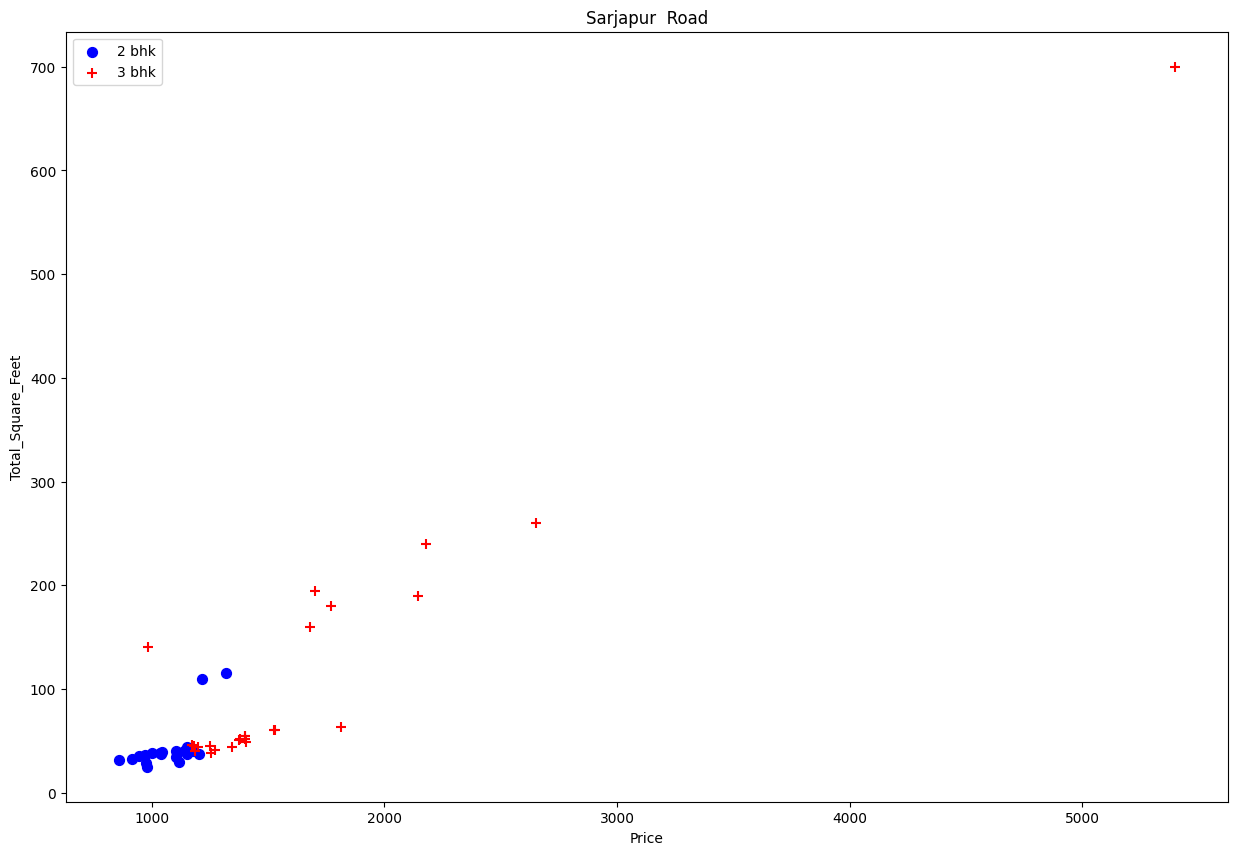

In [49]:
def plot_scatter(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = "blue", label = "2 bhk", s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color = "red", marker = "+", label = "3 bhk", s = 50)
    plt.xlabel("Price")
    plt.ylabel("Total_Square_Feet")
    plt.title(location)
    plt.legend()
plot_scatter(df4, "Sarjapur  Road")

In [50]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stat = {}
        for bhk, bhk_df in location_df.groupby("bhk"):
            bhk_stat[bhk] = {
                "mean": np.mean(bhk_df.price_sqft),
                "std": np.std(bhk_df.price_sqft),
                "count": bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats = bhk_stat.get(bhk - 1)
            if stats and stats["count"] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_sqft < stats["mean"]].index.values)
    return df.drop(exclude_indices, axis="index")

df5 =remove_bhk_outlier(df4)

df5.shape

(1360, 8)

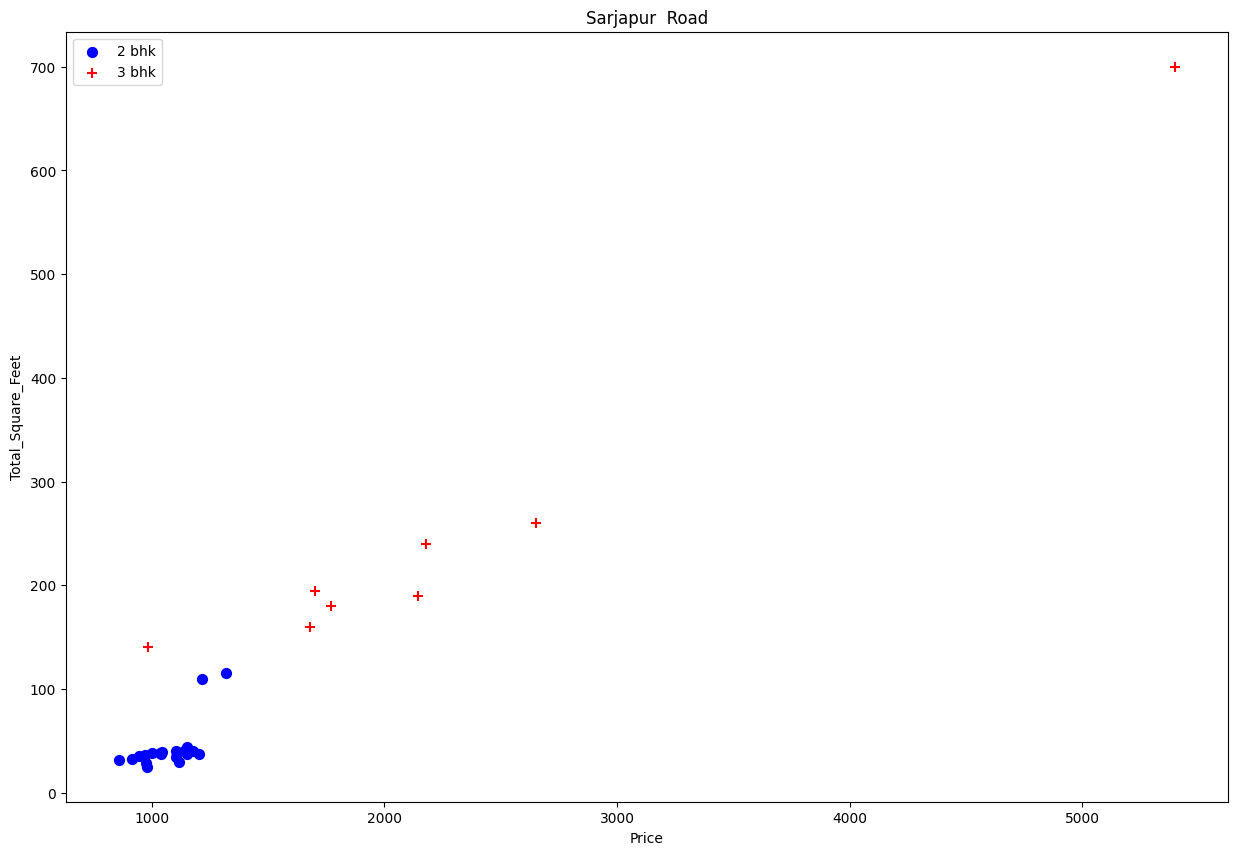

In [51]:
plot_scatter(df5, "Sarjapur  Road")

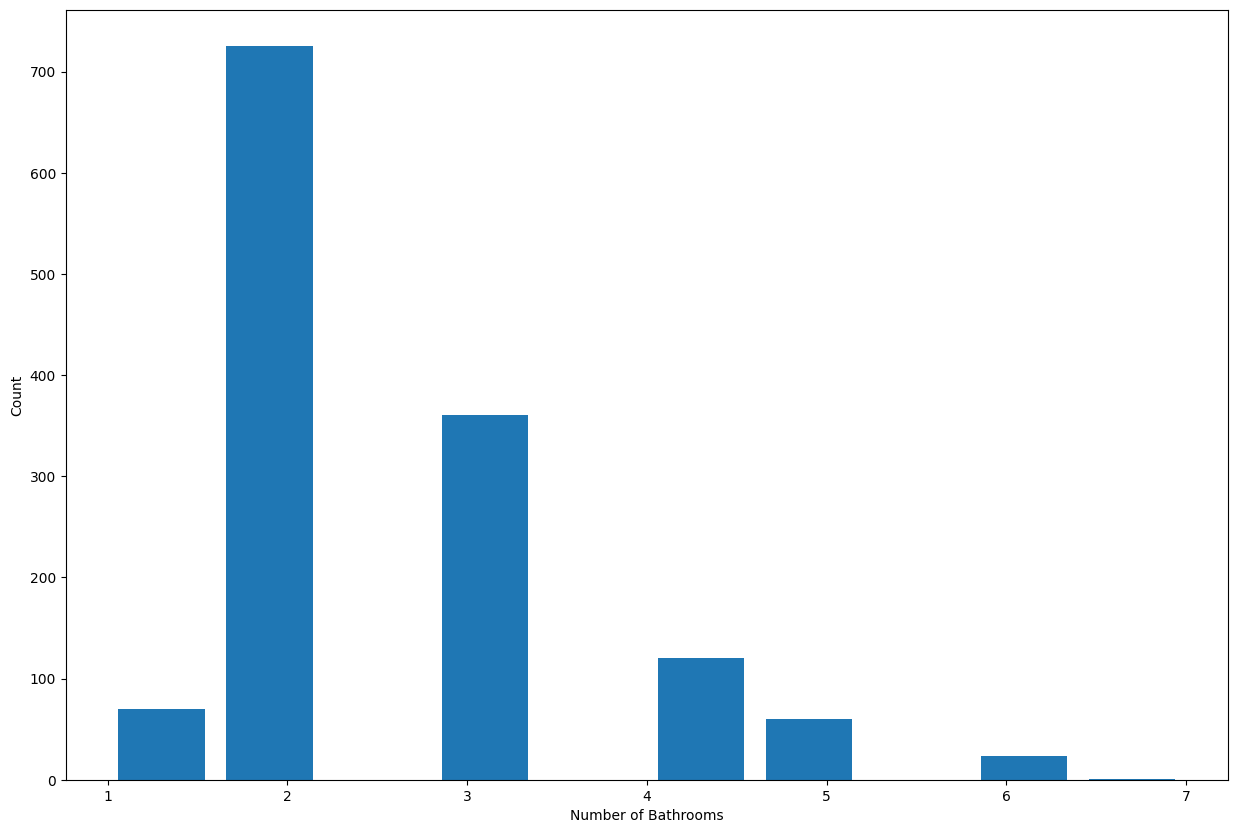

In [52]:
plt.hist(df5.bath, rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")
plt.show()

In [53]:
df5[(df5.bath) > (df5.bhk + 2)].shape

(0, 8)

In [54]:
df5.shape

(1360, 8)

In [55]:
df5.nunique()

area_type        4
location       143
total_sqft     694
bath             7
balcony          4
price          515
bhk              6
price_sqft    1191
dtype: int64

In [56]:
df5.sample(20)

,area_type,location,total_sqft,bath,balcony,price,bhk,price_sqft
791,Super built-up Area,Kengeri Satellite Town,1025.0,2.0,1.0,28.57,2,2787.317073
608,Super built-up Area,Jakkur,1100.0,2.0,2.0,52.00,2,4727.272727
551,Super built-up Area,Hosa Road,1063.0,2.0,1.0,32.79,2,3084.666040
1264,Super built-up Area,Thigalarapalya,4190.0,4.0,3.0,380.00,4,9069.212411
1218,Super built-up Area,Thanisandra,1140.0,2.0,1.0,36.00,2,3157.894737
1041,Super built-up Area,Raja Rajeshwari Nagar,1196.0,2.0,2.0,40.54,2,3389.632107
219,Super built-up Area,Budigere,1149.0,2.0,2.0,65.00,2,5657.093124
767,Built-up Area,Kasavanhalli,3260.0,4.0,1.0,240.00,4,7361.963190
1501,Super built-up Area,others,2000.0,3.0,2.0,1063.00,4,53150.000000
292,Super built-up Area,Electronic City,880.0,2.0,1.0,19.00,2,2159.090909


In [57]:
df6 = df5.copy()

In [58]:
df6.drop(["area_type", "price_sqft"], axis = 1, inplace = True)

In [59]:
df6.sample(10)

,location,total_sqft,bath,balcony,price,bhk
447,Hebbal,1315.0,3.0,3.0,65.00,3
602,JP Nagar,4000.0,4.0,3.0,441.00,4
1184,Subramanyapura,1200.0,2.0,2.0,52.00,2
1522,others,1541.0,2.0,1.0,181.00,2
958,Old Madras Road,1165.0,2.0,1.0,40.77,2
1204,Thanisandra,1114.0,2.0,1.0,39.00,2
1396,Yeshwanthpur,1856.0,4.0,2.0,180.00,3
1367,Yelahanka,2475.0,4.0,0.0,186.00,4
1425,others,2204.0,2.0,3.0,305.00,3
635,Jigani,3170.0,5.0,2.0,230.00,4


In [60]:
dummies = pd.get_dummies(df6.location)

In [61]:
dummies.shape

(1360, 143)

In [62]:
dummies.head(5)

,Devarabeesana Halli,Devarachikkanahalli,Thanisandra,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,others
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
df7 = pd.concat([df6,dummies.drop("others", axis = "columns")], axis = "columns")

df7.shape

(1360, 148)

In [64]:
df7.sample(14)

,location,total_sqft,bath,balcony,price,bhk,Devarabeesana Halli,Devarachikkanahalli,Thanisandra,1st Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
1284,Uttarahalli,3600.0,6.0,2.0,120.0,6,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1522,others,1541.0,2.0,1.0,181.0,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
204,Bommasandra,1447.0,3.0,2.0,80.0,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1081,Rajiv Nagar,1867.0,3.0,1.0,160.0,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1194,Talaghattapura,2106.0,3.0,2.0,126.0,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1092,Sahakara Nagar,1500.0,3.0,2.0,125.0,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18,7th Phase JP Nagar,1850.0,3.0,1.0,150.0,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1420,others,1010.0,2.0,3.0,148.0,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
294,Electronic City,2010.0,3.0,2.0,201.0,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
428,Hebbal,3960.0,5.0,3.0,386.0,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [65]:
x = df7.drop(["price", "location"], axis = "columns")

x.head()

,total_sqft,bath,balcony,bhk,Devarabeesana Halli,Devarachikkanahalli,Thanisandra,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1670.0,3.0,2.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1250.0,2.0,2.0,2,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1130.0,2.0,2.0,2,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1230.0,2.0,1.0,2,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,445.0,1.0,0.0,1,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
y = df7.price
y.head()

0    160.0
1     40.0
2     36.0
3     58.0
4     28.0
Name: price, dtype: float64

In [67]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [68]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test, y_test)

0.8585828268699669

In [69]:
from sklearn.model_selection import ShuffleSplit, KFold
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state = 10)

cross_val_score(LinearRegression(), x, y, cv = cv)

array([ 7.80845073e-01,  7.08286967e-01, -3.00956907e+14,  8.14432689e-01,
        6.19044570e-01])

In [70]:
kv = KFold(n_splits = 5, shuffle = True, random_state = 42)

cross_val_score(LinearRegression(), x, y, cv = kv)

array([0.85858283, 0.78419727, 0.81413013, 0.58415454, 0.71314956])

In [71]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = [Lasso(), DecisionTreeRegressor(), RandomForestRegressor()]
scores = []

for model in models:
    model.fit(x_train, y_train)
    model_score = model.score(x_test, y_test)
    scores.append((model, model_score))

# Sort the scores in descending order
scores.sort(key=lambda x: x[1], reverse=True)

# Print the scores
for model, score in scores:
    print(f"{model.__class__.__name__}: {score}")


Lasso: 0.7930621827467847
RandomForestRegressor: 0.7807448842864027
DecisionTreeRegressor: 0.535501640602392


In [72]:
x.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', ' Devarabeesana Halli',
       ' Devarachikkanahalli', ' Thanisandra', '1st Phase JP Nagar',
       '5th Phase JP Nagar', '7th Phase JP Nagar',
       ...
       'Thubarahalli', 'Tumkur Road', 'Uttarahalli', 'Varthur', 'Vijayanagar',
       'Vittasandra', 'Whitefield', 'Yelahanka', 'Yelahanka New Town',
       'Yeshwanthpur'],
      dtype='object', length=146)

In [73]:
def predict_price(location, total_sqft, bath, bhk):
    loc_index = np.where(x.columns == location)[0][0]

    input_features = np.zeros(len(x.columns))
    input_features[0] = total_sqft
    input_features[1] = bath
    input_features[2] = bhk
    if loc_index >= 0:
        input_features[loc_index] = 1

    return lr_clf.predict([input_features])[0]

In [74]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


72.69931776132614

In [75]:
predict_price('1st Phase JP Nagar', 1000, 2, 3)

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


75.92140187966572

In [76]:
predict_price('Indira Nagar', 1000, 2, 2)

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.89427271480149

In [77]:
predict_price('Indira Nagar', 1149, 2, 2)

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


115.6759213794512

In [78]:
import pandas as pd

# Assuming you have a DataFrame named df
filtered_rows = df[(df['location'] == 'Indira Nagar') & (df['bath'] == 2) & (df['bhk'] == 2)]

# Print the filtered rows
print(filtered_rows)


                  area_type      location  total_sqft  bath  balcony  price  \
1128   Super built-up  Area  Indira Nagar      1128.0   2.0      2.0  105.0   
3260         Built-up  Area  Indira Nagar      1210.0   2.0      1.0  102.0   
3308         Built-up  Area  Indira Nagar      1224.0   2.0      2.0  105.0   
3918   Super built-up  Area  Indira Nagar      1400.0   2.0      2.0  168.0   
4795   Super built-up  Area  Indira Nagar      1145.0   2.0      2.0  100.0   
5022   Super built-up  Area  Indira Nagar      1470.0   2.0      2.0  170.0   
7722   Super built-up  Area  Indira Nagar      1475.0   2.0      2.0  171.0   
11058  Super built-up  Area  Indira Nagar      1149.0   2.0      1.0  130.0   

       bhk  
1128     2  
3260     2  
3308     2  
3918     2  
4795     2  
5022     2  
7722     2  
11058    2  
